# 泰坦尼克号数据的分析项目

泰坦尼克号数据：包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。这个数据集来自 Kaggle，该网站上能够查看这个数据集的详细描述。

In [31]:
# 引入 numpy 和 pandas 模块
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
titanic_data = pd.DataFrame(pd.read_csv('titanic-data.csv'))
# 查看下数据样本的相关信息
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# 查看下数据样本的前3行数据
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


    # 数据集的字段注释
    PassengerId => 乘客ID
    Survived => 存活(0存活、1死亡)
    Pclass => 乘客等级(1/2/3等舱位)
    Name => 乘客姓名
    Sex => 性别
    Age => 年龄
    SibSp => 堂兄弟/妹个数
    Parch => 父母与小孩个数
    Ticket => 船票信息
    Fare => 票价
    Cabin => 客舱
    Embarked => 登船港口

In [6]:
# 查看数据集的 统计汇总
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 从以上的统计汇总信息中，可以得出以下结论：
- Age、Cabin、Embarked的数据有缺失
- Survived.mean=0.38，Survived的值为1或0，所以这次事故中乘客的存活率为0.38
- Age.min最小年龄的乘客不到1岁，而Age.max最大年龄的乘客为80岁，乘客平均年龄为29岁
- Pclass.mean=2.3，舱位分为1/2/3等，而mean大于2，所以2、3等舱位数量最多

### 针对该数据样本提出的问题
- a1.舱位1/2/3等，分别个是多少？
- 答：1/2/3等舱位数量分别为216、184、491。
- a2.年龄最小不到1岁的乘客和年龄最大80岁的乘客，他们是否在事故中幸存下来？
- 答：年龄最大和最小的两位乘客在那次事故中幸存。

Pclass1: 216
Pclass2: 184
Pclass3: 491


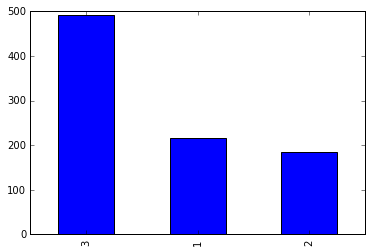

In [11]:
# 定一个计数函数
def count_class(data, class_name):
    return data[data==class_name].count()

# a1.舱位1/2/3等，分别个是多少？
titanic_data_Pclass = titanic_data['Pclass']

print "Pclass1:", count_class(titanic_data_Pclass, 1)
print "Pclass2:", count_class(titanic_data_Pclass, 2)
print "Pclass3:", count_class(titanic_data_Pclass, 3)

titanic_data.Pclass.value_counts().plot(kind="bar")

In [15]:
# a2.年龄最小不到1岁的乘客和年龄最大80岁的乘客，他们是否在事故中幸存下来？
age_for_min = titanic_data['Age'].argmin()
age_for_max = titanic_data['Age'].argmax()
# print age_for_min, age_for_max
age_min_Survived = titanic_data.iloc[[age_for_min]]
age_max_Survived = titanic_data.iloc[[age_for_max]]
print age_min_Survived['Survived']
print age_max_Survived['Survived']

803    1
Name: Survived, dtype: int64
630    1
Name: Survived, dtype: int64


### 提出新的问题
- b1.乘客的获救情况？
- 答：891名乘客中，有342名乘客获救，549名成员在事故中遇难。
- b2.1/2/3等舱位分别的获救情况？
- 答：Pclass_1： 总数：216 存活：136 存活率：0.62962962963
-    Pclass_2： 总数：184 存活：87 存活率：0.472826086957
-    Pclass_3： 总数：491 存活：119 存活率：0.242362525458
- b3.乘客中男性和女性的的获救情况？
- 答：male： 总数：577 存活：109 存活率：0.188908145581
-    female： 总数：314 存活：233 存活率：0.742038216561

Survived: 342
Dead: 549


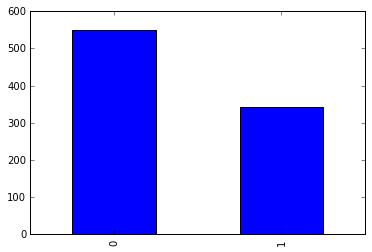

In [13]:
# b1.乘客的获救情况？
print "Survived:", count_class(titanic_data['Survived'], 1)
print "Dead:", count_class(titanic_data['Survived'], 0)
titanic_data.Survived.value_counts().plot(kind="bar")

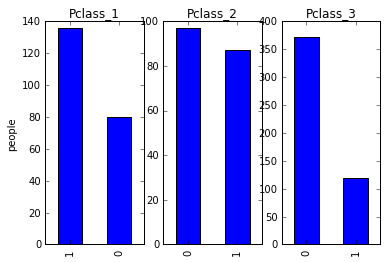

In [39]:
# b2.1/2/3等舱位分别的获救情况？
plt.subplot2grid((1,3),(0,0))
plt.ylabel(u"people")
plt.title(u"Pclass_1")
titanic_data[titanic_data.Pclass==1].Survived.value_counts().plot(kind="bar")
plt.subplot2grid((1,3),(0,1))
plt.title(u"Pclass_2")
titanic_data[titanic_data.Pclass==2].Survived.value_counts().plot(kind="bar")
plt.subplot2grid((1,3),(0,2))
plt.title(u"Pclass_3")
titanic_data[titanic_data.Pclass==3].Survived.value_counts().plot(kind="bar")

In [69]:
# 统计存活率
def count_Survived(data):
    data_all = data.Survived.count()
    data_Survived = data.Survived.value_counts()
    return "总数：{} 存活：{} 存活率：{}".format(data_all, data_Survived[1], 1.0 * data_Survived[1]/data_all)

print "Pclass_1：", count_Survived(titanic_data[titanic_data.Pclass==1])
print "Pclass_2：", count_Survived(titanic_data[titanic_data.Pclass==2])
print "Pclass_3：", count_Survived(titanic_data[titanic_data.Pclass==3])

Pclass_1： 总数：216 存活：136 存活率：0.62962962963
Pclass_2： 总数：184 存活：87 存活率：0.472826086957
Pclass_3： 总数：491 存活：119 存活率：0.242362525458


male： 总数：577 存活：109 存活率：0.188908145581
female： 总数：314 存活：233 存活率：0.742038216561


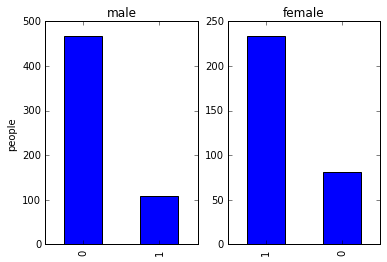

In [71]:
# b3.乘客中男性和女性的的获救情况？
plt.subplot2grid((1,2),(0,0))
plt.ylabel(u"people")
plt.title(u"male")
titanic_data[titanic_data.Sex=="male"].Survived.value_counts().plot(kind="bar")
plt.subplot2grid((1,2),(0,1))
plt.title(u"female")
titanic_data[titanic_data.Sex=="female"].Survived.value_counts().plot(kind="bar")

print "male：", count_Survived(titanic_data[titanic_data.Sex=="male"])
print "female：", count_Survived(titanic_data[titanic_data.Sex=="female"])

### 结论
泰坦尼克号的事故乘客的存活率比较低为*0.38*。船舱的等级越高，存活的几率越大，反之等级越低存活的可能性越小，这也与实际相符，因为高等级的船舱地理位置、逃生空间较好。乘客中男性的存活率较低为*0.19*，而女性的存活率达到*0.74*，说明逃生时执行了“女士优先”。